In [91]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [92]:
import numpy as np 
import pandas as pd

In [93]:
frac_charge_yield = np.random.random_sample(200)
radiation_softness = np.random.random_sample(200) / 10
dose = np.random.random_sample(200) * 100
voltage_shift = dose * radiation_softness * frac_charge_yield
experimental_voltage_shift = voltage_shift * (1 + np.random.random_sample(200))

In [94]:
df = pd.DataFrame(data={
    'frac_charge_yield': np.round(frac_charge_yield, 4),
    'radiation_softness': np.round(radiation_softness, 4),
    'dose': np.round(dose, 4),
    'voltage_shift': np.round(voltage_shift, 4),
    'experimental_voltage_shift': np.round(experimental_voltage_shift, 4)
    
})

In [95]:
X = df.drop(columns=['experimental_voltage_shift'])   #Separate input values from the desired output
y = df['experimental_voltage_shift']   #Isolate the desired output parameter

In [97]:
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [98]:
model = Sequential()
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0)

In [99]:
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_absolute_error'])

In [100]:
model.fit(x=X_train,
          y=y_train,
          epochs=200,
          batch_size = 150,
          validation_data = (X_test, y_test),
          callbacks=[early_stopping, reduce_lr])

Epoch 1/200


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 144ms/step - loss: 5.8326 - mean_absolute_error: 1.5535 - val_loss: 7.5117 - val_mean_absolute_error: 1.7139 - learning_rate: 0.0010
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 5.2875 - mean_absolute_error: 1.4746 - val_loss: 6.8829 - val_mean_absolute_error: 1.6466 - learning_rate: 0.0010
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 4.7428 - mean_absolute_error: 1.3932 - val_loss: 6.3050 - val_mean_absolute_error: 1.5855 - learning_rate: 0.0010
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4.4271 - mean_absolute_error: 1.3600 - val_loss: 5.7862 - val_mean_absolute_error: 1.5254 - learning_rate: 0.0010
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 4.0279 - mean_absolute_error: 1.3032 - val_loss: 5.2670 - val_mean_absolute_error: 1.4636 - learning_rate: 0.0010
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3.6896 - mean_absolute_error: 1.2584 - val_loss: 4.7607 - val_mean_absolute_error: 1.3998 - l

In [101]:
losses = pd.DataFrame(model.history.history)

<Axes: >

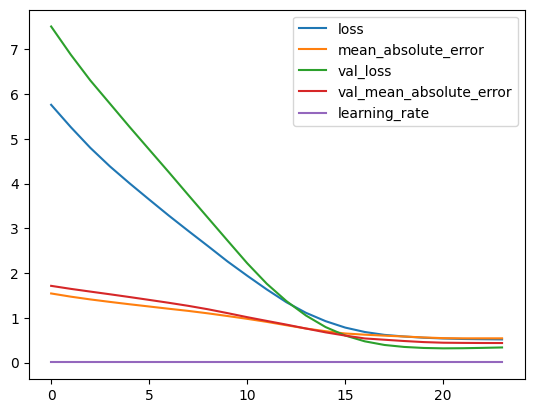

In [102]:
losses.plot()

In [103]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [104]:
from sklearn.metrics import mean_absolute_error

In [105]:
print(mean_absolute_error(y_test, predictions))

0.43554120689772075
